# Mid-Course Project



### Problem Statement

A multinational retail company decides to embark on a campaign called **'Operation  Increase Sales and Profit' (OISP)** which focuses on increasing the sales of the company and maximising profit. 

Before the management team of the company can take any actionable decision with regards to the campaign,they want to draw the necessary insight from their 'sitting data'.

As their Data Analyst,you are presented with their four year daily sales records (**superstore data.csv**).

#### Task
Analyse the given  data and advise management on what to do to increase sales and profit as intended in the compaign.

Kindly  outlay your analytical steps inline with CRISP-DM(Cross Industry Standard Process for Data Mining)steps, asking the nescessary questions and providing answers based on the data.


Management expects statistical summaries of the key variables considering the aim of the campaign, visualizations and a report on your findings and your advice.

**Use Powerpoint or any other presentation application for your presentation.**

Good Luck !








In [4]:
##Importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_columns',None)


In [5]:
#Reading the data
#NB: Make sure you the data in your current working directory

data = pd.read_csv('superstore data.csv',parse_dates = ['Order Date','Ship Date'],encoding = 'latin1')

In [6]:
data.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,NaN,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,2011-01-01,2011-05-01,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,NaN,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,2011-01-01,2011-05-01,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,NaN,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [4]:
data.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
51285,32593,CA-2014-115427,2014-12-31,2015-04-01,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,United States,94533.0,US,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium
51286,47594,MO-2014-2560,2014-12-31,2015-05-01,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Draâ,Morocco,NaN,Africa,Africa,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.49,Medium
51287,8857,MX-2014-110527,2014-12-31,2015-02-01,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,Nicaragua,NaN,LATAM,Central,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.35,Medium
51288,6852,MX-2014-114783,2014-12-31,2015-06-01,Standard Class,TD-20995,Tamara Dahlen,Consumer,Juárez,Chihuahua,Mexico,NaN,LATAM,North,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.20,Medium
51289,36388,CA-2014-156720,2014-12-31,2015-04-01,Standard Class,JM-15580,Jill Matthias,Consumer,Loveland,Colorado,United States,80538.0,US,West,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048,0.17,Medium


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

### Hints on Data preparation and exploration 

1. Load the data.
2. Inspect the data
3. Check for missing values
4. Check the data of each column
5. Check the different categories in the categorical variables
6. Take a view of the data
7. Take the descritive statistics for the numerical variables
9. Check the ditribution of the variables
10. Feature Engineering
#Create columns for:

#Unit price (sale/quantity)

#Year

#Month

#interval between the order date and the shipping date in days.


## Hints on the analysis 

### Check: The following  possible questions may of interest to you.

1. What is the sales and profit per market? 

2. What is the most and least profitable market?

3. How are you going to increase the sales for the products that least bought?

4. Which month does the company records more sales?

5. What is the correlation between discount and sale?

6. Does the shipping cost affect the sales?

7. What is the dominant product category in each market?

8. City with most orders for a given product category?

9. which products are making loss?

10. Which segment provides more profit?

11. what is the correlation between quantity and profit?

12. what it the correlation between shipping cost and profit?

13. Which order priority yields more sales?

14. What is the average shipping cost to each region?

15. What product categories should be targetted to the  different markets?

16. Does the interval between the order date and the shipping date affect sale and profit


In [7]:
#cchanging the columns to lower case
data.columns = data.columns.str.lower()

In [7]:
data.corr(method='spearman')

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
Row ID,1.000000,0.011466,-0.143405,-0.238759,0.016795,-0.045767,-0.128602
Postal Code,0.011466,1.000000,-0.002059,0.013952,0.052793,-0.005451,-0.004908
Sales,-0.143405,-0.002059,1.000000,0.416397,-0.100112,0.490195,0.913261
Quantity,-0.238759,0.013952,0.416397,1.000000,0.017665,0.201442,0.378736
Discount,0.016795,0.052793,-0.100112,0.017665,1.000000,-0.595969,-0.093739
Profit,-0.045767,-0.005451,0.490195,0.201442,-0.595969,1.000000,0.449408
Shipping Cost,-0.128602,-0.004908,0.913261,0.378736,-0.093739,0.449408,1.000000


In [8]:
#replacing the spacing in the column heading with an underscore
data.columns = data.columns.str.replace(" ", "_")

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   row_id          51290 non-null  int64         
 1   order_id        51290 non-null  object        
 2   order_date      51290 non-null  datetime64[ns]
 3   ship_date       51290 non-null  datetime64[ns]
 4   ship_mode       51290 non-null  object        
 5   customer_id     51290 non-null  object        
 6   customer_name   51290 non-null  object        
 7   segment         51290 non-null  object        
 8   city            51290 non-null  object        
 9   state           51290 non-null  object        
 10  country         51290 non-null  object        
 11  postal_code     9994 non-null   float64       
 12  market          51290 non-null  object        
 13  region          51290 non-null  object        
 14  product_id      51290 non-null  object        
 15  ca

There are no null values in the dataset

In [10]:
data.shape

(51290, 24)

In [11]:
data.isnull().sum()

row_id                0
order_id              0
order_date            0
ship_date             0
ship_mode             0
customer_id           0
customer_name         0
segment               0
city                  0
state                 0
country               0
postal_code       41296
market                0
region                0
product_id            0
category              0
sub-category          0
product_name          0
sales                 0
quantity              0
discount              0
profit                0
shipping_cost         0
order_priority        0
dtype: int64

In [12]:
#postal code

In [13]:
duplicates = data.duplicated()
data[duplicates]

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,country,postal_code,market,region,product_id,category,sub-category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority


There are no duplicates

In [14]:
#data.drop("postal_code", axis =1, inplace = True )

In [15]:
#data.drop("row_id", axis =1, inplace = True )

In [16]:
data['ship_mode'].unique()

array(['Standard Class', 'Second Class', 'First Class', 'Same Day'],
      dtype=object)

In [17]:
#data.columns

In [18]:
columns=["ship_mode","segment","market","region","category","sub-category","order_priority"]
for col in columns:
    print(col)
    print(data[col].value_counts())
    print("\n")

ship_mode
Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: ship_mode, dtype: int64


segment
Consumer       26518
Corporate      15429
Home Office     9343
Name: segment, dtype: int64


market
APAC      11002
LATAM     10294
EU        10000
US         9994
EMEA       5029
Africa     4587
Canada      384
Name: market, dtype: int64


region
Central           11117
South              6645
EMEA               5029
North              4785
Africa             4587
Oceania            3487
West               3203
Southeast Asia     3129
East               2848
North Asia         2338
Central Asia       2048
Caribbean          1690
Canada              384
Name: region, dtype: int64


category
Office Supplies    31273
Technology         10141
Furniture           9876
Name: category, dtype: int64


sub-category
Binders        6152
Storage        5059
Art            4883
Paper          3538
Chairs         3434
Phones         3357
Furnishings    31

In [19]:
data.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,country,postal_code,market,region,product_id,category,sub-category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority
0,42433,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,NaN,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,2011-01-01,2011-05-01,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,NaN,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,2011-01-01,2011-05-01,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,NaN,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [20]:
#data['row_id'].duplicated


In [21]:
#descriptive analysis
data.describe()

,row_id,postal_code,sales,quantity,discount,profit,shipping_cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


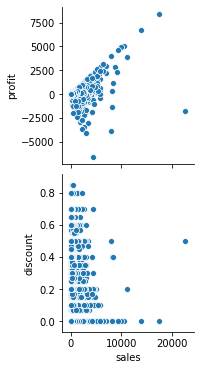

In [24]:
sns.pairplot(data,x_vars="sales",y_vars=["profit","discount"])

#Unit price (sale/quantity)

#Year

#Month

#interval between the order date and the shipping date in days.

In [25]:
data.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,country,postal_code,market,region,product_id,category,sub-category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority
0,42433,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,NaN,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,2011-01-01,2011-05-01,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,NaN,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,2011-01-01,2011-05-01,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,NaN,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium



sales= actual_cost*quantity - discount(actual_cost*quantity)
sales=actual_cost*quantity(1-discount)
sales/(1-discount)=actual_cost*quantity(1-discount)/(1-discount)
actual_cost*quantity = sales/(1-discount)

In [33]:

def calculate_actual_cost(sales, quantity, discount):   
    unit_price=(sales/(quantity*(1-discount)))
    return unit_price


In [34]:
#calculate_actual_cost(677.7780,4, 0.17)

In [35]:
data['unit_price'] = data['sales']/(data['quantity']*(1 - data['discount']))

In [36]:
data.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,country,postal_code,market,region,product_id,category,sub-category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,unit_price
0,42433,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,NaN,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,204.15
1,22253,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,44.58
2,48883,HU-2011-1220,2011-01-01,2011-05-01,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,NaN,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,16.53
3,11731,IT-2011-3647632,2011-01-01,2011-05-01,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,NaN,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,29.91
4,22255,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,25.26


In [37]:
data['discounted_amount'] = data['discount']* data['unit_price']*data['quantity']

In [38]:
data.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,country,postal_code,market,region,product_id,category,sub-category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,unit_price,discounted_amount
0,42433,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,NaN,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,204.15,0.000
1,22253,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,44.58,13.374
2,48883,HU-2011-1220,2011-01-01,2011-05-01,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,NaN,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,16.53,0.000
3,11731,IT-2011-3647632,2011-01-01,2011-05-01,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,NaN,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,29.91,44.865
4,22255,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,25.26,12.630


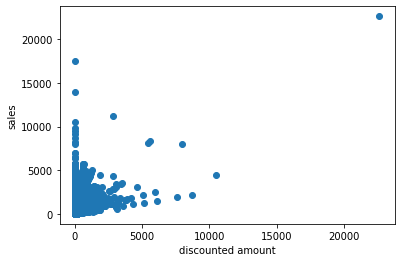

In [39]:
plt.scatter(x = data['discounted_amount'],y = data['sales'])
plt.xlabel("discounted amount")
plt.ylabel("sales")
plt.show()

In [40]:
discounted_data= data.loc[data['discounted_amount']>0]

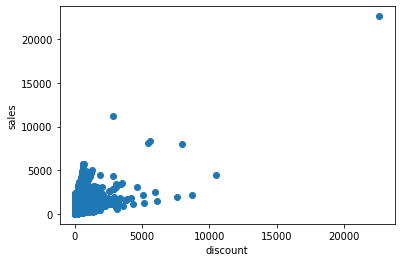

In [41]:
plt.scatter(x = discounted_data['discounted_amount'],y = discounted_data['sales'])
plt.xlabel("discount")
plt.ylabel("sales")
                                                                         
plt.show()

In [42]:
data['discounted_amount'].corr(data['sales'])

0.3882679020059107

In [43]:
data['interval']= (data['ship_date']-data['order_date'])
data['interval']=data['interval']/np.timedelta64(1,'D')
data['interval'] = abs(data["interval"])
data['interval']

0        151.0
1        212.0
2        120.0
3        120.0
4        212.0
         ...  
51285     91.0
51286    121.0
51287     32.0
51288    152.0
51289     91.0
Name: interval, Length: 51290, dtype: float64

In [44]:
print(data['interval'].value_counts())

4.0      7166
5.0      5459
2.0      4007
6.0      2836
3.0      2635
         ... 
206.0       5
21.0        3
147.0       3
294.0       2
50.0        2
Name: interval, Length: 150, dtype: int64


In [45]:
shipping_data= data.loc[data['ship_date']<data["order_date"]] #yy-mm--dd
shipping_data

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,country,postal_code,market,region,product_id,category,sub-category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,unit_price,discounted_amount,interval
1512,25146,ID-2011-41632,2011-06-01,2011-01-13,Standard Class,RD-19660,Robert Dilbeck,Home Office,Ho Chi Minh City,Ho Chí Minh City,Vietnam,NaN,APAC,Southeast Asia,OFF-ST-10001631,Office Supplies,Storage,"Tenex Trays, Blue",89.9886,2,0.17,29.2686,3.62,Medium,54.21,18.4314,139.0
1514,25145,ID-2011-41632,2011-06-01,2011-01-13,Standard Class,RD-19660,Robert Dilbeck,Home Office,Ho Chi Minh City,Ho Chí Minh City,Vietnam,NaN,APAC,Southeast Asia,OFF-PA-10003407,Office Supplies,Paper,"Enermax Memo Slips, Recycled",38.7693,3,0.17,11.5893,2.45,Medium,15.57,7.9407,139.0
1517,33056,CA-2011-141817,2011-06-01,2011-01-13,Standard Class,MB-18085,Mick Brown,Consumer,Philadelphia,Pennsylvania,United States,19143.0,US,East,OFF-AR-10003478,Office Supplies,Art,"Avery Hi-Liter EverBold Pen Style Fluorescent Highlighters, 4/Pack",19.5360,3,0.20,4.8840,1.85,Low,8.14,4.8840,139.0
1794,28200,IN-2011-33351,2011-07-02,2011-02-13,Standard Class,DB-13660,Duane Benoit,Consumer,Zhenjiang,Jiangsu,China,NaN,APAC,North Asia,OFF-AP-10003491,Office Supplies,Appliances,"Hoover Coffee Grinder, Silver",278.1600,4,0.00,133.4400,20.16,Medium,69.54,0.0000,139.0
1795,24076,IN-2011-40512,2011-07-02,2011-02-14,Standard Class,LT-17110,Liz Thompson,Consumer,Bekasi,Jawa Barat,Indonesia,NaN,APAC,Southeast Asia,TEC-PH-10002443,Technology,Phones,"Cisco Signal Booster, with Caller ID",252.0378,2,0.17,6.0378,11.19,Medium,151.83,51.6222,138.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51088,33005,CA-2014-123491,2014-10-31,2014-06-11,Standard Class,JK-15205,Jamie Kunitz,Consumer,San Francisco,California,United States,94122.0,US,West,OFF-PA-10003424,Office Supplies,Paper,"""While you Were Out"" Message Book, One Form per Page",7.4200,2,0.00,3.7100,0.84,Medium,3.71,0.0000,142.0
51089,33040,CA-2014-152807,2014-10-31,2014-04-11,Standard Class,MC-18100,Mick Crebagga,Consumer,Philadelphia,Pennsylvania,United States,19140.0,US,East,OFF-ST-10002486,Office Supplies,Storage,Eldon Shelf Savers Cubes and Bins,11.1680,2,0.20,-2.5128,0.78,High,6.98,2.7920,203.0
51090,32957,CA-2014-127285,2014-10-31,2014-07-11,Standard Class,MM-18055,Michelle Moray,Consumer,Seattle,Washington,United States,98115.0,US,West,OFF-BI-10002072,Office Supplies,Binders,Cardinal Slant-D Ring Binders,13.9040,2,0.20,5.2140,0.67,Medium,8.69,3.4760,112.0
51091,32790,CA-2014-139661,2014-10-31,2014-04-11,Standard Class,JW-15220,Jane Waco,Corporate,Vancouver,Washington,United States,98661.0,US,West,FUR-FU-10002885,Furniture,Furnishings,Magna Visual Magnetic Picture Hangers,9.6400,2,0.00,3.6632,0.44,Medium,4.82,0.0000,203.0


#### Check: The following possible questions may of interest to you.
What is the sales and profit per market?

What is the most and least profitable market?

How are you going to increase the sales for the products that least bought?

Which month does the company records more sales?

What is the correlation between discount and sale?

Does the shipping cost affect the sales?

What is the dominant product category in each market?

City with most orders for a given product category?

which products are making loss?

Which segment provides more profit?

what is the correlation between quantity and profit?

what it the correlation between shipping cost and profit?

Which order priority yields more sales?

What is the average shipping cost to each region?

What product categories should be targetted to the different markets?

Does the interval between the order date and the shipping date affect sale and profit

In [51]:
data.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,country,postal_code,market,region,product_id,category,sub-category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,unit_price,discounted_amount,interval,month,year
0,42433,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,NaN,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,204.15,0.000,151.0,January,2011
1,22253,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,44.58,13.374,212.0,January,2011
2,48883,HU-2011-1220,2011-01-01,2011-05-01,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,NaN,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,16.53,0.000,120.0,January,2011
3,11731,IT-2011-3647632,2011-01-01,2011-05-01,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,NaN,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,29.91,44.865,120.0,January,2011
4,22255,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,25.26,12.630,212.0,January,2011


## QUESTION 1
**1) What is the sales and profit per market?**

In [52]:
data["market"].unique()

array(['Africa', 'APAC', 'EMEA', 'EU', 'US', 'LATAM', 'Canada'],
      dtype=object)

###### a groupby gives a dataframe

In [53]:
#option 1
sp_market=data.groupby("market")["sales","profit"].sum()
sp_market

,sales,profit
market,,
APAC,3.585744e+06,436000.04900
Africa,7.837732e+05,88871.63100
Canada,6.692817e+04,17817.39000
EMEA,8.061613e+05,43897.97100
EU,2.938089e+06,372829.74150
LATAM,2.164605e+06,221643.48708
US,2.297201e+06,286397.02170


In [54]:
#option 2
data.groupby("market").sum().loc[:,["sales","profit"]]

,sales,profit
market,,
APAC,3.585744e+06,436000.04900
Africa,7.837732e+05,88871.63100
Canada,6.692817e+04,17817.39000
EMEA,8.061613e+05,43897.97100
EU,2.938089e+06,372829.74150
LATAM,2.164605e+06,221643.48708
US,2.297201e+06,286397.02170


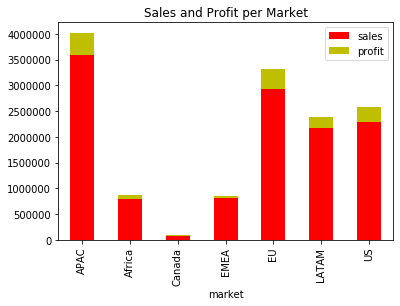

In [55]:
#sp_market.plot(kind="bar",stacked=True,color=("y","b"),title="Sales and Profit per Market")
sp_market.plot(kind="bar",stacked=True,color=("r","y"))
plt.title("Sales and Profit per Market")
plt.show()

## QUESTION 2

**2) What is the most and least profitable market**

In [56]:
sp_market

,sales,profit
market,,
APAC,3.585744e+06,436000.04900
Africa,7.837732e+05,88871.63100
Canada,6.692817e+04,17817.39000
EMEA,8.061613e+05,43897.97100
EU,2.938089e+06,372829.74150
LATAM,2.164605e+06,221643.48708
US,2.297201e+06,286397.02170


In [57]:
least_profit=sp_market.sort_values("profit",ascending=True)["profit"]
least_profit

market
Canada     17817.39000
EMEA       43897.97100
Africa     88871.63100
LATAM     221643.48708
US        286397.02170
EU        372829.74150
APAC      436000.04900
Name: profit, dtype: float64

In [58]:
#f string method
print(f"{least_profit.index[0]} is the least profitable market. it has a profit of {least_profit.iloc[0]}  and {least_profit.index[6]} is the most profitable market. it has a profit of {least_profit.iloc[0]}")

Canada is the least profitable market. it has a profit of 17817.389999999992  and APAC is the most profitable market. it has a profit of 17817.389999999992


In [59]:
# string format method
print("{} is the least profitable market. it has a profit of {}".format(least_profit.index[0],least_profit.iloc[0]))

Canada is the least profitable market. it has a profit of 17817.389999999992


##### Observation
Canada is the least profitable market. it has a profit of 17817.389999999992  and APAC is the most profitable market. it has a profit of  436000.04900

## QUESTION 3
**How are you going to increase the sales for the products that are least bought?**

Least bought product characteristics
#quantity
#product name
#sales

In [60]:
data["product_name"].nunique()

3788

In [61]:
#prove to confirm how specific we should be for each product_name as a particular product_name can belong to different Categories
#data[(data["product_name"]=="Staples") & ( data["category"]=="Furniture")]

In [62]:
#data[(data["product_name"]=="Staples") & ( data["category"]=="Office Supplies")]

In [63]:
#least product bought based on quantity sold
data.groupby(["product_name","category","sub-category"]).sum()[["quantity","sales","profit"]].sort_values("quantity")

,,,quantity,sales,profit
product_name,category,sub-category,,,
"Bush Saratoga Collection 5-Shelf Bookcase, Hanover Cherry, *Special Order",Furniture,Bookcases,1,119.8330,-12.6882
Global Enterprise Series Seating Low-Back Swivel/Tilt Chairs,Furniture,Chairs,1,207.1840,25.8980
Boston 1900 Electric Pencil Sharpener,Office Supplies,Art,1,14.9800,4.4940
Xerox 20,Office Supplies,Paper,1,6.4800,3.1104
Penpower WorldCard Pro Card Scanner,Technology,Machines,1,91.4750,-1.8295
...,...,...,...,...,...
"Stockwell Paper Clips, Assorted Sizes",Office Supplies,Fasteners,253,2395.4378,251.2878
"Sanford Pencil Sharpener, Water Color",Office Supplies,Art,259,5581.9741,601.9441
"Rogers File Cart, Single Width",Office Supplies,Storage,262,29466.3053,2394.8953


In [64]:
#least product bought based on sales
data.groupby(["product_name","category","sub-category"]).sum()[["sales","quantity"]].sort_values("sales").head(10)

,,,sales,quantity
product_name,category,sub-category,,
Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac,Office Supplies,Appliances,1.624,2
Avery 5,Office Supplies,Labels,5.760,2
Xerox 20,Office Supplies,Paper,6.480,1
Grip Seal Envelopes,Office Supplies,Envelopes,7.072,2
Avery Hi-Liter Pen Style Six-Color Fluorescent Set,Office Supplies,Art,7.700,2
"Avery Hi-Liter Comfort Grip Fluorescent Highlighter, Yellow Ink",Office Supplies,Art,7.800,4
Xerox 1989,Office Supplies,Paper,7.968,2
4009 Highlighters,Office Supplies,Art,8.040,6
Stockwell Gold Paper Clips,Office Supplies,Fasteners,8.096,5


### Analysis of least product by market

In [65]:
markets=data["market"].unique()
markets

array(['Africa', 'APAC', 'EMEA', 'EU', 'US', 'LATAM', 'Canada'],
      dtype=object)

In [66]:
APAC=data[data["market"]=="APAC"]
Africa=data[data["market"]=="Africa"]
EMEA=data[data["market"]=="EMEA"]
EU=data[data["market"]=="EU"]
US=data[data["market"]=="US"]
LATAM=data[data["market"]=="LATAM"]
Canada=data[data["market"]=="Canada"]

In [67]:
APAC.groupby(["product_name","category","sub-category"]).sum()[["sales"]].sort_values("sales").head(10)

,,,sales
product_name,category,sub-category,
"Advantus Thumb Tacks, Assorted Sizes",Office Supplies,Fasteners,9.9360
"Accos Push Pins, 12 Pack",Office Supplies,Fasteners,22.4595
"OIC Thumb Tacks, Assorted Sizes",Office Supplies,Fasteners,23.0400
"Ames Manila Envelope, Recycled",Office Supplies,Envelopes,23.4900
"Novimex File Folder Labels, Adjustable",Office Supplies,Labels,27.6750
"Stanley Pens, Fluorescent",Office Supplies,Art,28.5012
"Rubbermaid Door Stop, Durable",Furniture,Furnishings,29.8059
"Eldon Folders, Single Width",Office Supplies,Storage,34.0200
"Avery File Folder Labels, Laser Printer Compatible",Office Supplies,Labels,34.3824


In [68]:
APAC.groupby(["product_name","category","sub-category"]).sum()[["quantity"]].sort_values("quantity").head(10)

,,,quantity
product_name,category,sub-category,
"Rubbermaid Door Stop, Durable",Furniture,Furnishings,1
"Ames Manila Envelope, Recycled",Office Supplies,Envelopes,1
"Hamilton Beach Microwave, Silver",Office Supplies,Appliances,1
"Advantus Thumb Tacks, Assorted Sizes",Office Supplies,Fasteners,1
"Apple Speaker Phone, with Caller ID",Technology,Phones,1
"Advantus Frame, Black",Furniture,Furnishings,1
"Barricks Conference Table, Adjustable Height",Furniture,Tables,1
"Barricks Wood Table, Adjustable Height",Furniture,Tables,1
"Hamilton Beach Microwave, Black",Office Supplies,Appliances,1


## Q4.Which month does the company records more sales?

In [ ]:
data.head()

In [ ]:
month_sales=data.groupby("month").sum()[["sales"]].sort_values("sales", ascending=False)
month_sales

In [ ]:
month_sales.index

In [ ]:
#Plotting to find the highest sales and rotating the xlabels
plt.figure(figsize=[5,5])
plt.bar(month_sales.index,month_sales["sales"])
plt.xticks(rotation=90)
plt.show()

## Q5.What is the correlation between discount and sale?

In [79]:
#Finding correlation using discount
#Not useful, use the discounted_amount
data["discount"].corr(data["sales"])

-0.08672186697182648

In [80]:
#Finding correlation using discounted_amount
data["discounted_amount"].corr(data["sales"])

0.3882679020059107

In [ ]:
plt.scatter(data["discount"],data["sales"])
plt.show()

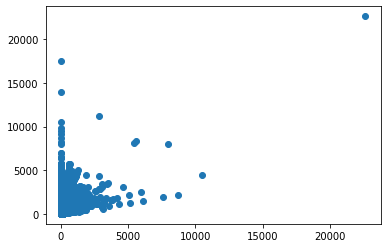

In [76]:
plt.scatter(data["discounted_amount"],data["sales"])
plt.show()

### There is a weak positive correlation as observed in the figure above

## Q6. Does the shipping cost affect the sales?

In [77]:
data["shipping_cost"].corr(data["sales"])

0.7680728376889517

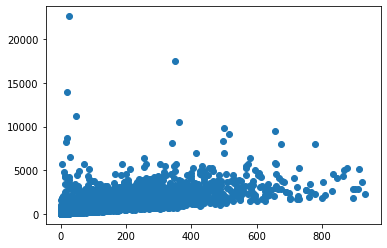

In [78]:
plt.scatter(data["shipping_cost"], data["sales"])

In [ ]:
#A regression plot to find the correlation between shipping cost and sales
#To change the colour of the line or scater supply the argument (line or scatter _kws)={"color":"red"}
sns.regplot(x="shipping_cost",y="sales",data=data, line_kws={"color": "red"})
plt.show()

## There is a strong positive correlation. The pearson rank correlation coefficient
is 0.7680728376889523